In [ ]:
# PART 0- Orient Yourself
# Strategy: Descriptive Statistics
# import libraries
# Use "Run All" to run the code from up to down 

import pandas as pd
import os
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns


# choose directory with raw data
data_dir = r"C:\Users\..."



In [241]:
# load raw data

df_gex = pd.read_csv(os.path.join(data_dir, "mammacarcinoma_gex.csv"))
df_pat = pd.read_csv(os.path.join(data_dir, "mammacarcinoma_pat.csv"))

# print basic information

print("GEX Shape:", df_gex.shape)
print("PAT Shape:", df_pat.shape)

print("\nDF_GEX Info:")
df_gex.info()

print("\nDF_PAT Info:")
df_pat.info()


# GEX contains 327 patients (lines) and 6385 genes (columns). PAT contains 327 patients (lines) and 7 characteristics (columns)

GEX Shape: (327, 6385)
PAT Shape: (327, 7)

DF_GEX Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Columns: 6385 entries, patient_id to GMEB2
dtypes: float64(6384), int64(1)
memory usage: 15.9 MB

DF_PAT Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  327 non-null    int64  
 1   node        247 non-null    float64
 2   grade       275 non-null    float64
 3   size        251 non-null    float64
 4   age         252 non-null    float64
 5   er          308 non-null    float64
 6   relapse     218 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.0 KB


In [242]:
# detailed overview of gene expression data
df_gex.describe()
# df_gex seems to contain no NAs.

,patient_id,DDR1,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,EPHB3,ESRRA,...,CASP8AP2,POLM,KLK5,SH3BP4,SPO11,TRDN,DKFZP564C196,YDD19,TAZ,GMEB2
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,...,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,163.000000,9.300535,6.067635,6.014904,7.454709,3.664965,5.005109,3.527161,6.823656,6.431840,...,6.345336,3.892984,5.374885,8.438321,2.589367,0.101640,2.192215,3.207747,6.063410,7.330444
std,94.540996,0.439355,0.572358,0.993585,0.652595,1.125597,0.737016,1.037315,0.753449,0.399846,...,0.557105,1.171283,0.831085,0.732759,1.423077,1.411159,1.259166,0.866970,0.639083,0.432525
min,0.000000,7.239200,3.206100,1.554300,5.793000,0.335880,1.922900,-0.364120,4.777600,5.036200,...,4.475300,0.807890,3.213100,4.817100,-2.954700,-2.440800,-1.990300,-0.528350,4.411900,5.865500
25%,81.500000,9.042150,5.658150,5.358150,6.897350,2.814500,4.661000,3.175600,6.330650,6.158100,...,6.004150,3.098450,4.857950,8.047700,1.603500,-0.851890,1.184350,2.850300,5.577000,7.008700
50%,163.000000,9.282800,6.019600,6.085800,7.681600,3.941200,5.041600,3.736400,6.782500,6.438400,...,6.372800,4.141800,5.237800,8.532700,2.981400,-0.209740,2.357600,3.333300,6.173300,7.331800
75%,244.500000,9.553500,6.479550,6.656100,7.954750,4.561050,5.405350,4.214350,7.268900,6.684100,...,6.702750,4.682150,5.801950,8.900000,3.726100,0.904770,3.162950,3.730300,6.548250,7.605200
max,326.000000,10.678000,7.480400,9.508000,8.554700,5.512900,7.573500,5.751800,9.443700,7.579800,...,8.610400,6.561800,8.579500,10.102000,5.158400,4.770900,5.181500,4.748200,7.717000,8.889600


In [243]:
#detailed overview of clincal data
df_pat.describe()
# there seems to be a high number of missing values in df_pat

,patient_id,node,grade,size,age,er,relapse
count,327.000000,247.000000,275.000000,251.000000,252.000000,308.000000,218.000000
mean,163.000000,0.222672,1.985455,2.224745,58.666667,0.850649,0.412844
std,94.540996,0.416885,0.693930,1.131280,11.897638,0.357014,0.493478
min,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000
25%,81.500000,0.000000,2.000000,1.500000,49.000000,1.000000,0.000000
50%,163.000000,0.000000,2.000000,2.100000,60.000000,1.000000,0.000000
75%,244.500000,0.000000,2.000000,2.800000,68.000000,1.000000,1.000000
max,326.000000,1.000000,3.000000,7.000000,88.000000,1.000000,1.000000


In [244]:
# calculate number of missing data

na_df1 = df_gex.isna().sum()
na_df2 = df_pat.isna().sum()

print("NA counts for DF GEX:")
print(na_df1)

print("\nNA counts for DF PAT:")
print(na_df2)

NA counts for DF GEX:
patient_id      0
DDR1            0
RFC2            0
HSPA6           0
PAX8            0
               ..
TRDN            0
DKFZP564C196    0
YDD19           0
TAZ             0
GMEB2           0
Length: 6385, dtype: int64

NA counts for DF PAT:
patient_id      0
node           80
grade          52
size           76
age            75
er             19
relapse       109
dtype: int64


In [245]:
summary_df1 = df_gex.describe(include="all").T
summary_df1["na_count"] = df_gex.isna().sum()
summary_df1["na_percentage"] = (df_gex.isna().sum() / len(df_gex)) * 100

print(summary_df1)

df_gex.isna().any().any()

#There are no NAs at all in df_gex

              count        mean        std      min       25%        50%  \
patient_id    327.0  163.000000  94.540996  0.00000  81.50000  163.00000   
DDR1          327.0    9.300535   0.439355  7.23920   9.04215    9.28280   
RFC2          327.0    6.067635   0.572358  3.20610   5.65815    6.01960   
HSPA6         327.0    6.014904   0.993585  1.55430   5.35815    6.08580   
PAX8          327.0    7.454709   0.652595  5.79300   6.89735    7.68160   
...             ...         ...        ...      ...       ...        ...   
TRDN          327.0    0.101640   1.411159 -2.44080  -0.85189   -0.20974   
DKFZP564C196  327.0    2.192215   1.259166 -1.99030   1.18435    2.35760   
YDD19         327.0    3.207747   0.866970 -0.52835   2.85030    3.33330   
TAZ           327.0    6.063410   0.639083  4.41190   5.57700    6.17330   
GMEB2         327.0    7.330444   0.432525  5.86550   7.00870    7.33180   

                    75%       max  na_count  na_percentage  
patient_id    244.50000  3

np.False_

In [246]:
# prepare data for patient characteristic table. -> included in  final report

summary_df2 = df_pat.describe(include="all").T
summary_df2["na_count"] = df_pat.isna().sum()
summary_df2["na_percentage"] = (df_pat.isna().sum() / len(df_pat)) * 100

summary_df2

# categorical variables have to be further analyzed

,count,mean,std,min,25%,50%,75%,max,na_count,na_percentage
patient_id,327.0,163.000000,94.540996,0.0,81.5,163.0,244.5,326.0,0,0.000000
node,247.0,0.222672,0.416885,0.0,0.0,0.0,0.0,1.0,80,24.464832
grade,275.0,1.985455,0.693930,1.0,2.0,2.0,2.0,3.0,52,15.902141
size,251.0,2.224745,1.131280,0.0,1.5,2.1,2.8,7.0,76,23.241590
age,252.0,58.666667,11.897638,24.0,49.0,60.0,68.0,88.0,75,22.935780
er,308.0,0.850649,0.357014,0.0,1.0,1.0,1.0,1.0,19,5.810398
relapse,218.0,0.412844,0.493478,0.0,0.0,0.0,1.0,1.0,109,33.333333


In [247]:
# preparation of categorical variables for patient characteristic table

categorical_vars = [
    "node",
    "grade",
    "er",
    "relapse"
]

def patient_characteristics_table(df, variables):
    tables = []
    n_total = len(df)

    for var in variables:
        counts = (
            df[var]
            .value_counts(dropna=False)
            .rename("count")
            .to_frame()
        )

        counts["percentage"] = (counts["count"] / n_total * 100).round(1)
        counts["variable"] = var
        counts["category"] = counts.index.astype(str)

        tables.append(counts.reset_index(drop=True))

    final_table = pd.concat(tables, ignore_index=True)
    return final_table[["variable", "category", "count", "percentage"]]

# Create table
patient_table = patient_characteristics_table(df_pat, categorical_vars)

# Create combined column AFTER table exists
patient_table["n (%)"] = (
    patient_table["count"].astype(str)
    + " ("
    + patient_table["percentage"].astype(str)
    + "%)"
)

# Final display (publication-ready)
patient_table[["variable", "category", "n (%)"]]



,variable,category,n (%)
0,node,0.0,192 (58.7%)
1,node,nan,80 (24.5%)
2,node,1.0,55 (16.8%)
3,grade,2.0,143 (43.7%)
4,grade,1.0,68 (20.8%)
5,grade,3.0,64 (19.6%)
6,grade,nan,52 (15.9%)
7,er,1.0,262 (80.1%)
8,er,0.0,46 (14.1%)
9,er,nan,19 (5.8%)


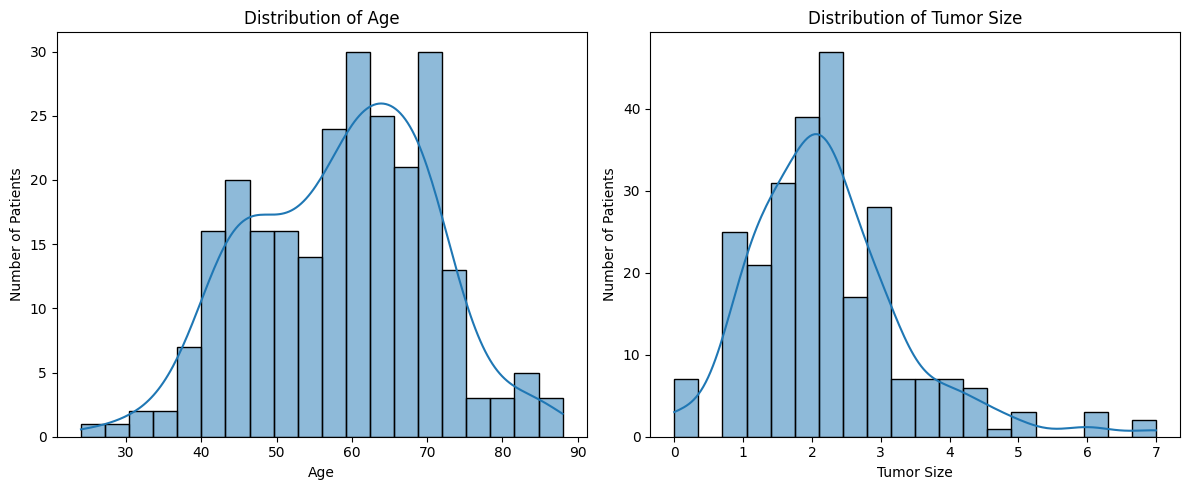

In [248]:
#  Visualize continuos data

plt.figure(figsize=(12, 5))

# Age
plt.subplot(1, 2, 1)
sns.histplot(df_pat["age"], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age")

# Tumor size
plt.subplot(1, 2, 2)
sns.histplot(df_pat["size"], bins=20, kde=True)
plt.xlabel("Tumor Size")
plt.ylabel("Number of Patients")
plt.title("Distribution of Tumor Size")

plt.tight_layout()
plt.show()

# normal distribution with left / right drift respectively

In [249]:
# Gene expression now will be analyzed in detail. First step: skewness analysis


df_gex_new = df_gex.drop(columns=['patient_id'])



skew_values = df_gex_new.apply(lambda x: skew(x, nan_policy='omit'))
skewness_values = df_gex_new.apply(lambda x: skew(x, nan_policy='omit'))

skew_df = pd.DataFrame({
    'gene': df_gex_new.columns,
    'skewness': skew_values
})


# Count of highly skewed genes (absolute skew > 1)
highly_skewed_count = (skew_df['skewness'].abs() > 1).sum()
print(f"Number of highly skewed genes (|skew| > 1): {highly_skewed_count} out of {df_gex_new.shape[1]}")

# Skewness as a measure of asymmetry of a distribution can be calculated using scipy.stats package. As a rule of thumb skewness with a value higher than 1 or lower than -1 is relevant. 
# A large proportion of genes show skewed distribution


Number of highly skewed genes (|skew| > 1): 1138 out of 6384


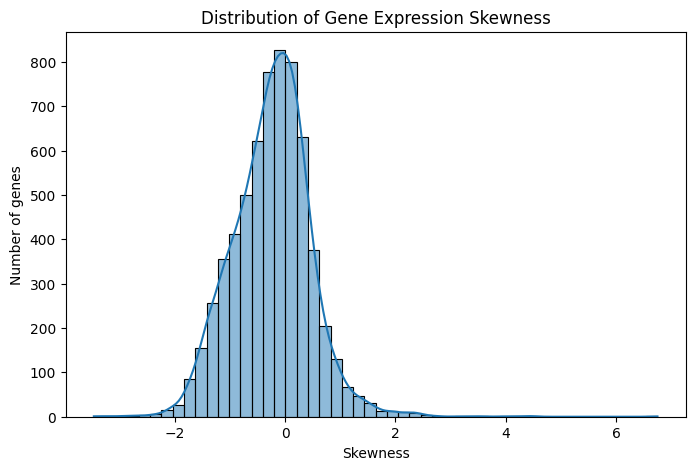

In [250]:

plt.figure(figsize=(8,5))
sns.histplot(skew_df['skewness'], bins=50, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Number of genes')
plt.title('Distribution of Gene Expression Skewness')
plt.show()

In [251]:
# name top skewed genes
top_skewed = skew_df.reindex(skew_df['skewness'].abs().sort_values(ascending=False).index)
print("Top 10 most skewed genes:")
print(top_skewed.head(10))

Top 10 most skewed genes:
              gene  skewness
NTSR2        NTSR2  6.745535
CSRP3        CSRP3  4.479410
TNNC1        TNNC1  4.435143
CKM            CKM  4.192544
TNNI1        TNNI1  3.922049
CTAG2        CTAG2  3.536572
IGFBP7      IGFBP7 -3.464303
TTYH1        TTYH1  3.332768
KIAA0649  KIAA0649 -3.295995
HK3            HK3  3.117502


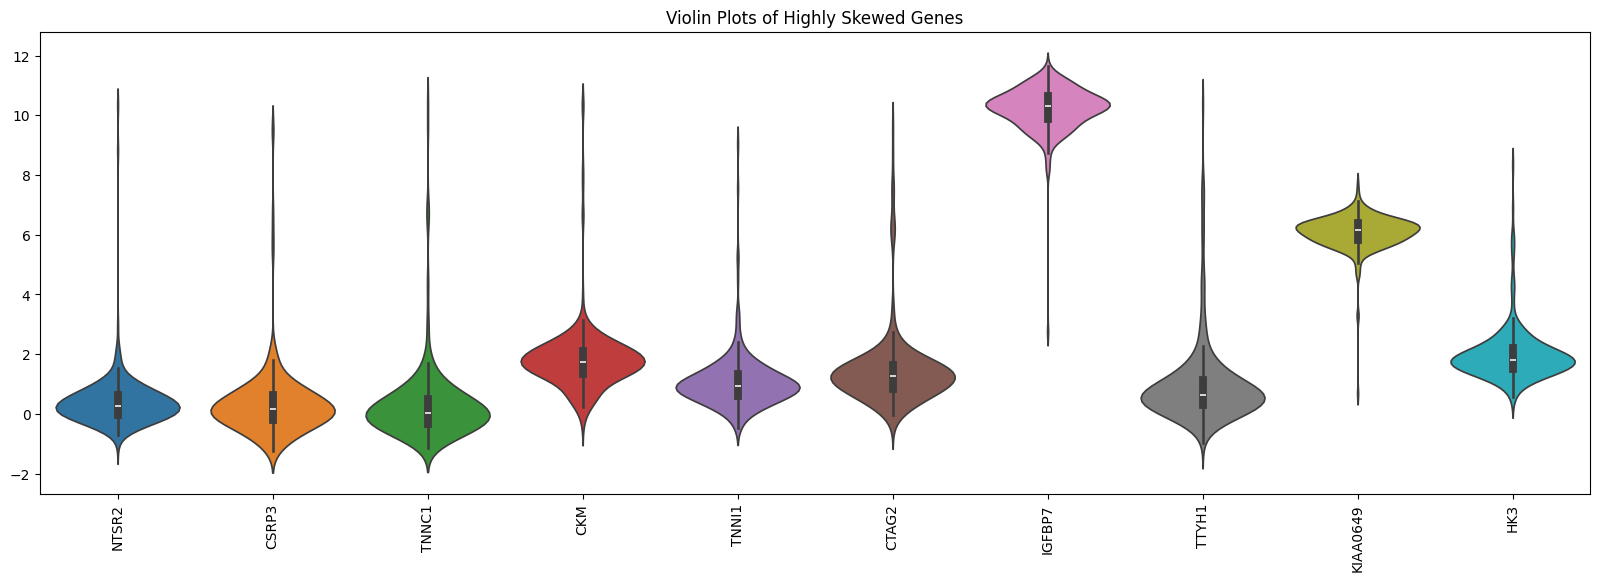

In [252]:
# Visualize top skewed genes

top_n = 10  # number of genes to plot
top_skewed_genes = skewness_values.abs().sort_values(ascending=False).head(top_n).index

plt.figure(figsize=(20, 6))
sns.violinplot(data=df_gex_new[top_skewed_genes])
plt.xticks(rotation=90)
plt.title("Violin Plots of Highly Skewed Genes")
plt.show()

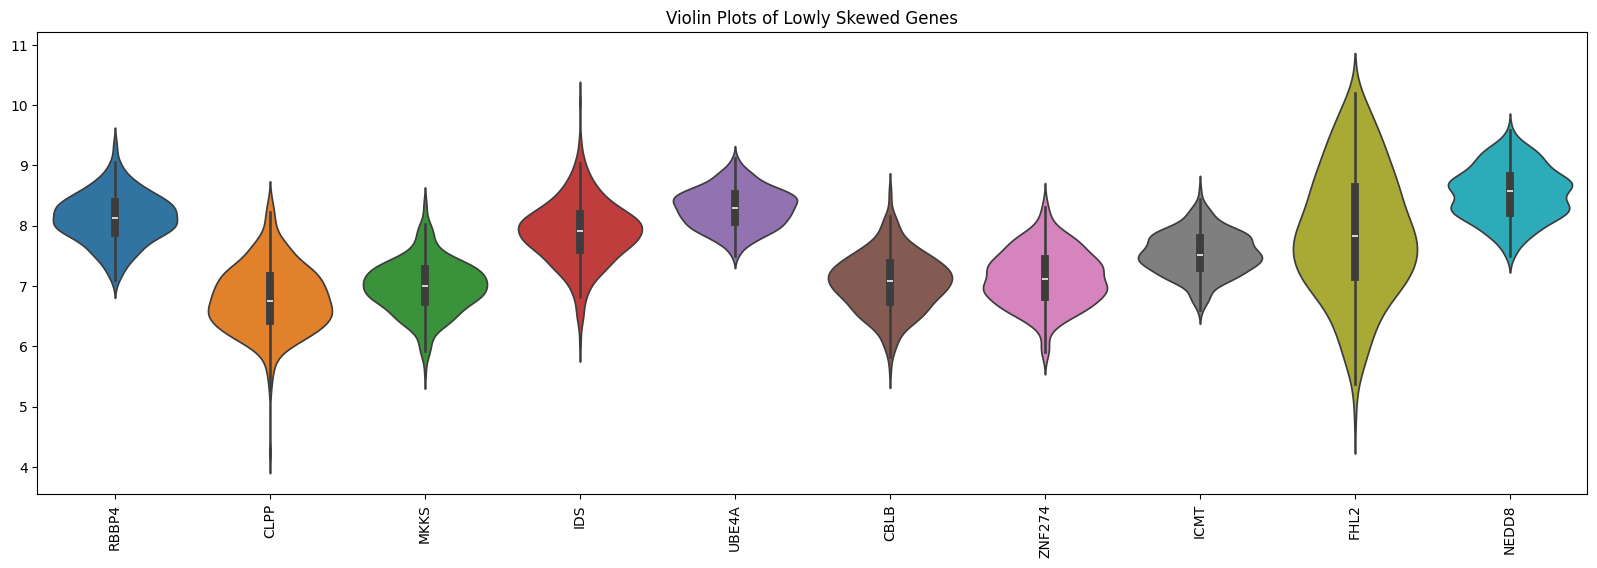

In [253]:
# as a proof of concept also genes with symmetric distribution are shown.

low_n = 10 
low_skewed_genes = skewness_values.abs().sort_values(ascending=True).head(top_n).index

plt.figure(figsize=(20, 6))
sns.violinplot(data=df_gex_new[low_skewed_genes])
plt.xticks(rotation=90)
plt.title("Violin Plots of Lowly Skewed Genes")
plt.show()

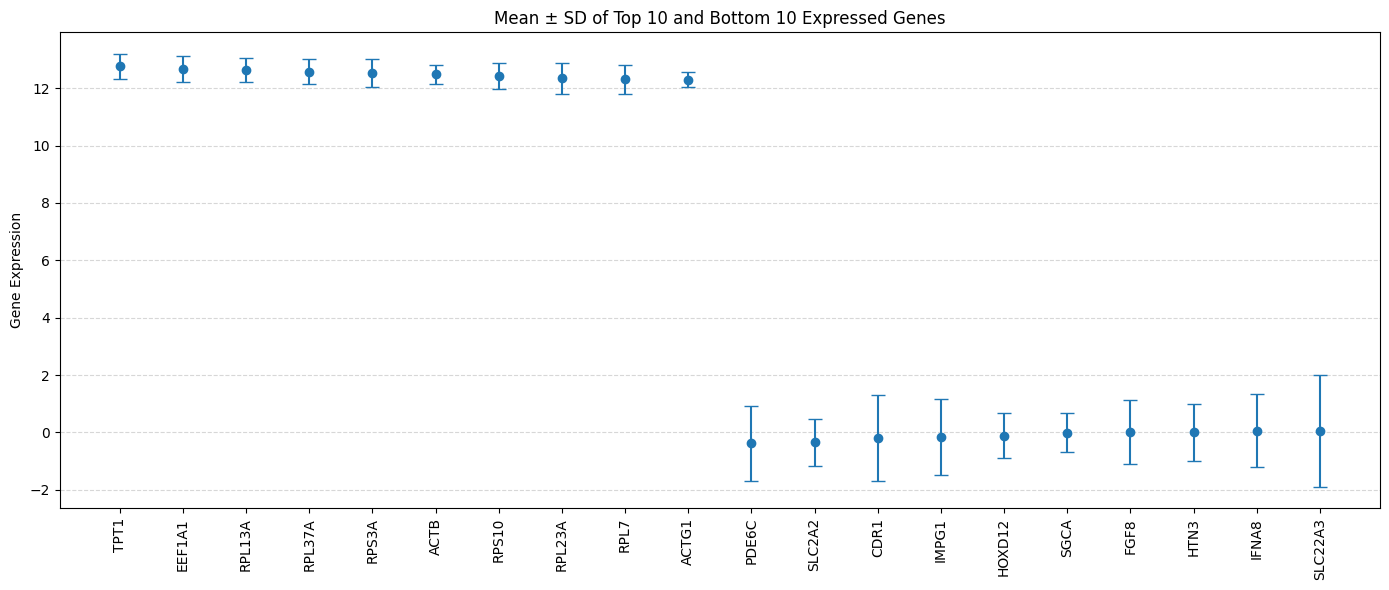

In [254]:
# Overview figure: top and bottom expressed genes with standard deviation
gene_stats = pd.DataFrame({
    "mean": df_gex_new.mean(),
    "std": df_gex_new.std()
})

top_10 = gene_stats.sort_values("mean", ascending=False).head(10)
bottom_10 = gene_stats.sort_values("mean", ascending=True).head(10)


plot_df = pd.concat([top_10, bottom_10])

plt.figure(figsize=(14, 6))

plt.errorbar(
    x=plot_df.index,
    y=plot_df["mean"],
    yerr=plot_df["std"],
    fmt="o",
    capsize=5
)

plt.xticks(rotation=90)
plt.ylabel("Gene Expression")
plt.title("Mean ± SD of Top 10 and Bottom 10 Expressed Genes")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# End of TASK 0


In [255]:
######TASK 1 #############################################
######################
#### Dimension reduction
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import pandas as pd





In [256]:
# Instantiate the standard scaler

scaler = StandardScaler()
all_scaled = scaler.fit_transform(df_gex_new)

In [257]:
# Instantiate the PCA to calculate principal components
# define complete datasets for each target

pca = PCA(n_components=2)
GEX_pca = pca.fit_transform(all_scaled)
er = df_pat["er"]
relapse= df_pat["relapse"]
node=df_pat["node"]
grade=df_pat["grade"]
size=df_pat["size"]

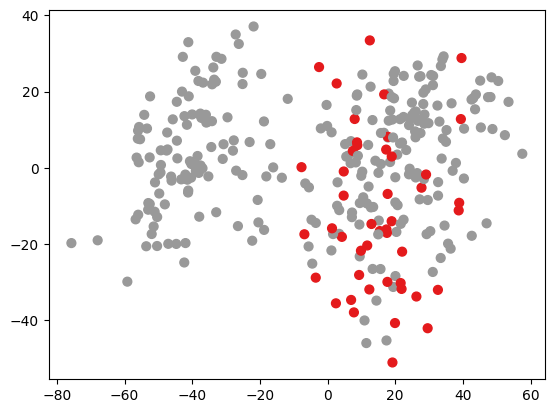

In [258]:
# Preliminary PCA for orientation

plt.figure()
plt.scatter(
    GEX_pca[:, 0],
    GEX_pca[:, 1],
    c=er,
    cmap=plt.cm.Set1,
    #edgecolor="k",
    s=40,
)


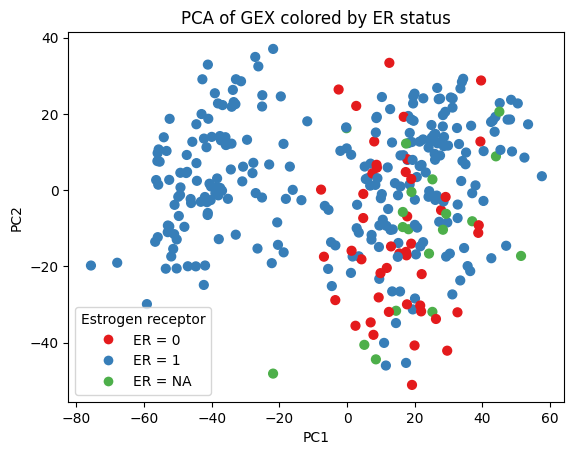

In [259]:
# PCA/ T-SNE figures for different targets

# Encode ER: 0, 1, NA → 0, 1, 2
er_encoded = er.copy()
er_encoded = er_encoded.fillna(2)

cmap = plt.cm.Set1
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5], ncolors=3)


plt.figure()
plt.scatter(
    GEX_pca[:, 0],
    GEX_pca[:, 1],
    c=er_encoded,
    norm=norm,
    cmap=cmap,
    s=40,
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='ER = 0',
           markerfacecolor=plt.cm.Set1(0), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='ER = 1',
           markerfacecolor=plt.cm.Set1(1), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='ER = NA',
           markerfacecolor=plt.cm.Set1(2), markersize=8),
]

plt.legend(handles=legend_elements, title="Estrogen receptor")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of GEX colored by ER status")
plt.show()

In [260]:
#####OTHER METHODS


# run the tSNE algorithm
tsne = TSNE(n_components=2)
GEX_tsne = tsne.fit_transform(all_scaled)

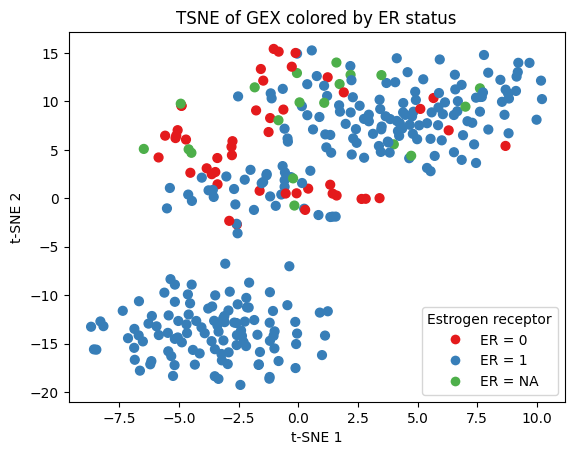

In [261]:
plt.figure()
plt.scatter(
    GEX_tsne[:, 0],
    GEX_tsne[:, 1],
    c=er_encoded,
    norm=norm,
    cmap=cmap,
    s=40,
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='ER = 0',
           markerfacecolor=plt.cm.Set1(0), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='ER = 1',
           markerfacecolor=plt.cm.Set1(1), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='ER = NA',
           markerfacecolor=plt.cm.Set1(2), markersize=8),
]

plt.legend(handles=legend_elements, title="Estrogen receptor")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("TSNE of GEX colored by ER status")
plt.show()

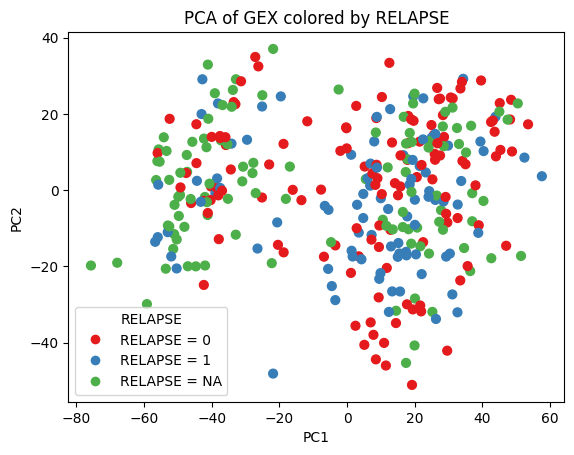

In [262]:
####OTHER TARGETS: 
target=relapse

# Encode relapse: 0, 1, NA → 0, 1, 2
target_encoded = target.copy()
target_encoded = target_encoded.fillna(2)

cmap = plt.cm.Set1
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5], ncolors=3)


plt.figure()
plt.scatter(
    GEX_pca[:, 0],
    GEX_pca[:, 1],
    c=target_encoded,
    norm=norm,
    cmap=cmap,
    s=40,
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='RELAPSE = 0',
           markerfacecolor=plt.cm.Set1(0), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='RELAPSE = 1',
           markerfacecolor=plt.cm.Set1(1), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='RELAPSE = NA',
           markerfacecolor=plt.cm.Set1(2), markersize=8),
]

plt.legend(handles=legend_elements, title="RELAPSE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of GEX colored by RELAPSE")
plt.show()

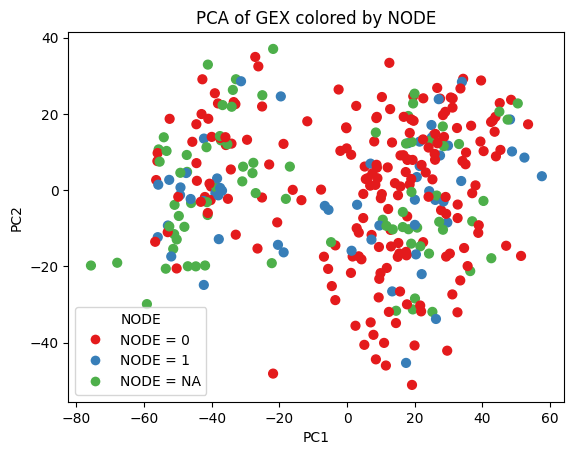

In [263]:
target=node

# Encode target: 0, 1, NA → 0, 1, 2
target_encoded = target.copy()
target_encoded = target_encoded.fillna(2)

cmap = plt.cm.Set1
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5], ncolors=3)


plt.figure()
plt.scatter(
    GEX_pca[:, 0],
    GEX_pca[:, 1],
    c=target_encoded,
    norm=norm,
    cmap=cmap,
    s=40,
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='NODE = 0',
           markerfacecolor=plt.cm.Set1(0), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='NODE = 1',
           markerfacecolor=plt.cm.Set1(1), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='NODE = NA',
           markerfacecolor=plt.cm.Set1(2), markersize=8),
]

plt.legend(handles=legend_elements, title="NODE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of GEX colored by NODE")
plt.show()

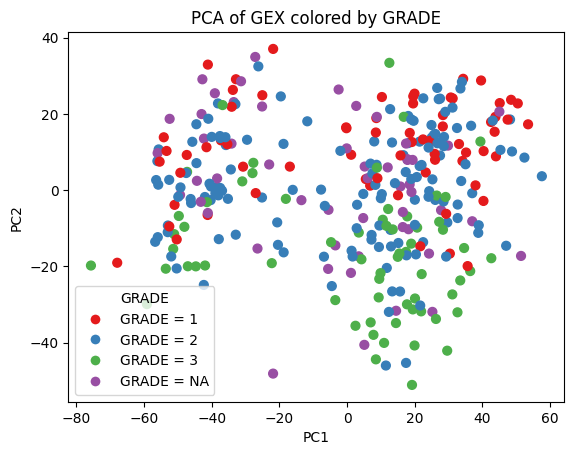

In [264]:
target=grade

# Encode target: 
target_encoded = target.copy()
target_encoded = target_encoded.fillna(4)

cmap = plt.cm.Set1
norm = mcolors.BoundaryNorm(
    boundaries=[0.5, 1.5, 2.5, 3.5, 4.5],
    ncolors=4
)

plt.figure()
plt.scatter(
    GEX_pca[:, 0],
    GEX_pca[:, 1],
    c=target_encoded,
    norm=norm,
    cmap=cmap,
    s=40,
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='GRADE = 1',
           markerfacecolor=cmap(norm(1)), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='GRADE = 2',
           markerfacecolor=cmap(norm(2)), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='GRADE = 3',
           markerfacecolor=cmap(norm(3)), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='GRADE = NA',
           markerfacecolor=cmap(norm(4)), markersize=8),
]

plt.legend(handles=legend_elements, title="GRADE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of GEX colored by GRADE")
plt.show()

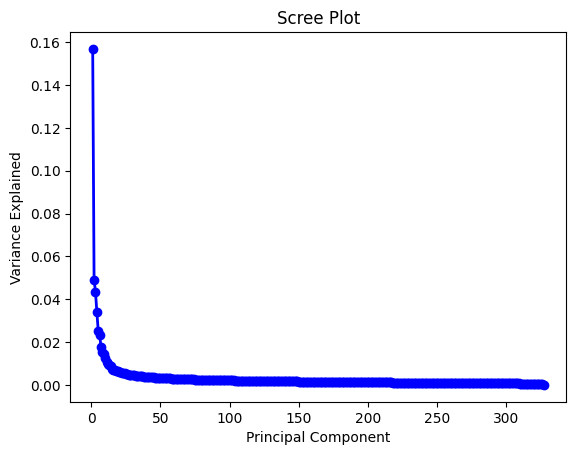

In [265]:
############Scree PLOT
pca = PCA()

scree_pca = pca.fit_transform(all_scaled)


PC_values = np.arange(pca.n_components_) + 1
plt.figure()
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [266]:
########TASK 2###################
###Cluster analyses
# import libraries

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from seaborn import clustermap

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

import pandas as pd

from scipy.stats import ttest_ind

In [267]:
######CLUSTER ANALYSIS

##GEX_pca is the PCA result of scaled gene expression data (or scaled data without PCA= all_scaled) and can be reused for this task. Using PCA data or scaled data (without PCA transformation) resulted in comparable results. 
# You may choose from one of these two data sets. This analysis example uses PCA-transformed data for cluster analysis.
# Calculation of different clustering methods. 


y_k = KMeans(n_clusters=2, n_init=10).fit(GEX_pca).labels_
y_gm_full = GaussianMixture(n_components=2, covariance_type="full").fit_predict(GEX_pca)
y_gm_spherical = GaussianMixture(n_components=2, covariance_type="spherical").fit_predict(GEX_pca)
y_gm_diag = GaussianMixture(n_components=2, covariance_type="diag").fit_predict(GEX_pca)
y_gm_tied = GaussianMixture(n_components=2, covariance_type="tied").fit_predict(GEX_pca)
y_h = AgglomerativeClustering(n_clusters=2).fit(GEX_pca).labels_


cluster_results = {
    "Ground Truth (ER)": df_pat["er"],
    "KMeans": y_k,
    "GMM (full)": y_gm_full,
    "GMM (spherical)": y_gm_spherical,
    "GMM (diag)": y_gm_diag,
    "GMM (tied)": y_gm_tied,
    "Agglomerative": y_h,}





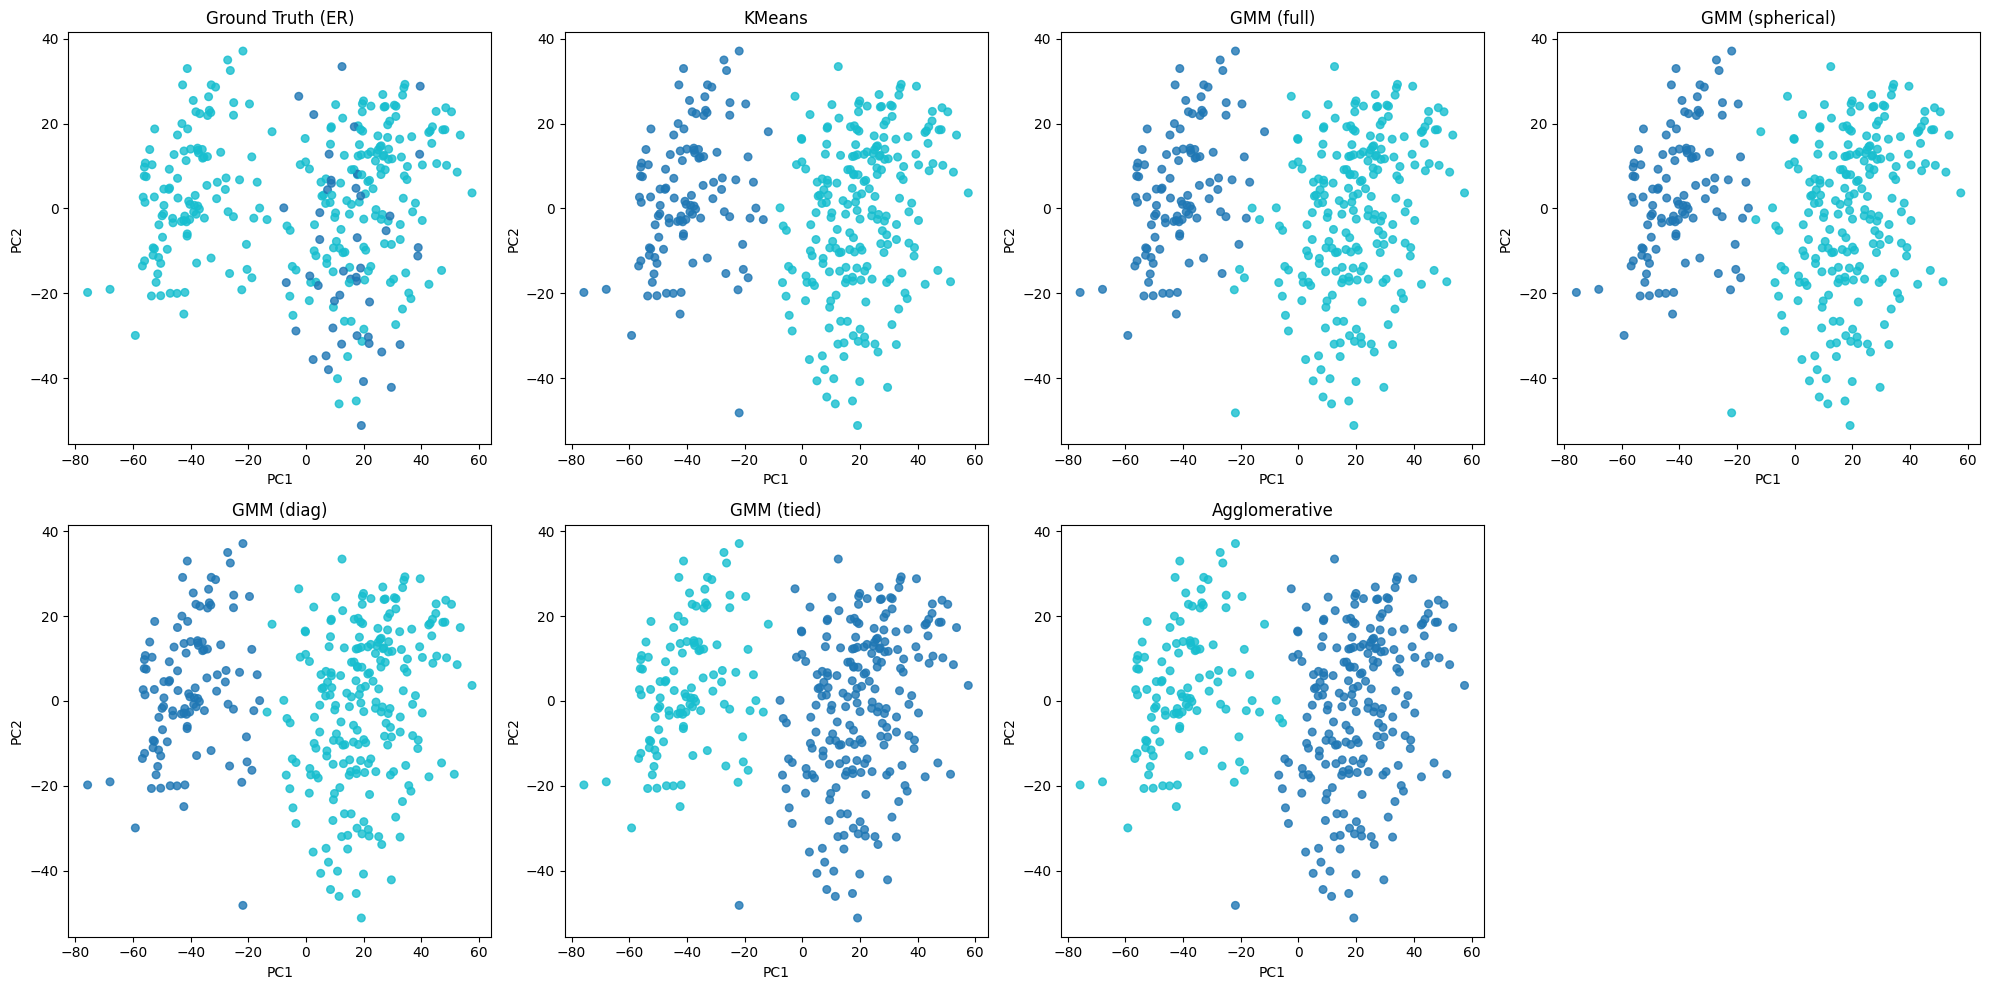

In [268]:
# Results of cluster analyses/ visualization 

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, (name, labels) in zip(axes, cluster_results.items()):
    scatter = ax.scatter(
        GEX_pca[:, 0],
        GEX_pca[:, 1],
        c=labels,
        cmap="tab10",
        s=30,
        alpha=0.8
    )
    ax.set_title(name)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

# Remove empty subplot (since 7 methods)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


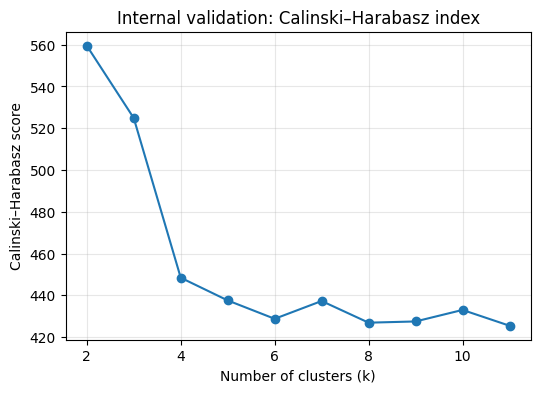

In [269]:
# Calculation of Calinski-Harabasz index (maximum value indicates number of clusters)

a = np.zeros(10)
k_values = np.arange(2, 12)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=1)
    labels = kmeans.fit_predict(GEX_pca)
    a[i] = metrics.calinski_harabasz_score(GEX_pca, labels)

plt.figure(figsize=(6,4))
plt.plot(k_values, a, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski–Harabasz score")
plt.title("Internal validation: Calinski–Harabasz index")
plt.grid(alpha=0.3)
plt.show()

#result. cluster n=2

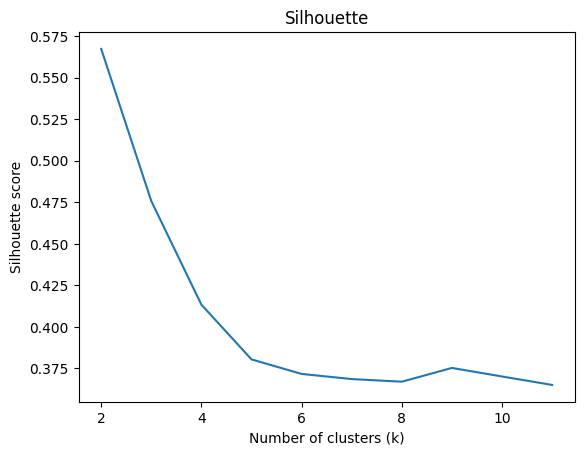

In [270]:
# Silhouette score.

a = np.zeros(10)
for i in np.arange(10):
    kmeans_model = KMeans(n_clusters=i+2, random_state=1).fit(GEX_pca)
    labels = kmeans_model.labels_
    a[i] = metrics.silhouette_score(GEX_pca, labels, metric='euclidean')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette")
plt.plot(np.arange(10)+2,a)

# Silhouette score indicates 2 as optimal number of clusters

In [271]:
# Stability across seeds. 

seeds = range(20)
labels_all = []

for seed in seeds:
    labels = KMeans(n_clusters=2, n_init=20, random_state=seed)\
                .fit_predict(all_scaled)
    labels_all.append(labels)

# pairwise ARI
aris = []
for i in range(len(labels_all)):
    for j in range(i+1, len(labels_all)):
        aris.append(adjusted_rand_score(labels_all[i], labels_all[j]))

np.mean(aris), np.std(aris)
# result: stable, initialization location does not matter ARI=1 STD=0

(np.float64(1.0), np.float64(0.0))

In [272]:
#Key features per Cluster= calculation of differences in gene expression between clusters

labels = KMeans(n_clusters=2, n_init=20, random_state=1)\
            .fit_predict(all_scaled)

results = []

for gene in df_gex_new.columns:
    g0 = df_gex_new.loc[labels == 0, gene]
    g1 = df_gex_new.loc[labels == 1, gene]

    stat, pval = ttest_ind(g0, g1, nan_policy="omit")

    results.append({
        "gene": gene,
        "mean_cluster_0": g0.mean(),
        "mean_cluster_1": g1.mean(),
        "difference": g1.mean() - g0.mean(),
        "p_value": pval
    })

diff_df = (
    pd.DataFrame(results)
    .assign(abs_diff=lambda df: df["difference"].abs())
    .sort_values("abs_diff", ascending=False)
    .drop(columns="abs_diff")
)

In [273]:
diff_df.head(20)

,gene,mean_cluster_0,mean_cluster_1,difference,p_value
3313,GABRG2,1.695559,4.074458,2.378899,5.976773e-54
6166,PRO2012,1.436684,3.776918,2.340233,4.447356e-56
6241,KLF15,3.115847,5.447409,2.331562,2.131624e-88
3656,HOXD13,1.470987,3.775387,2.304400,2.545274e-65
3539,USP2,2.727656,4.977070,2.249413,1.620055e-59
5355,SSTR4,1.720687,3.931937,2.211250,4.495569e-54
5954,TIAM2,3.189407,5.341911,2.152503,6.582468e-75
6049,FSCN3,3.188149,5.316034,2.127885,1.140704e-74
3306,AFM,2.041796,4.150116,2.108320,6.654451e-56
2906,GH2,0.952194,3.046269,2.094075,1.408502e-40


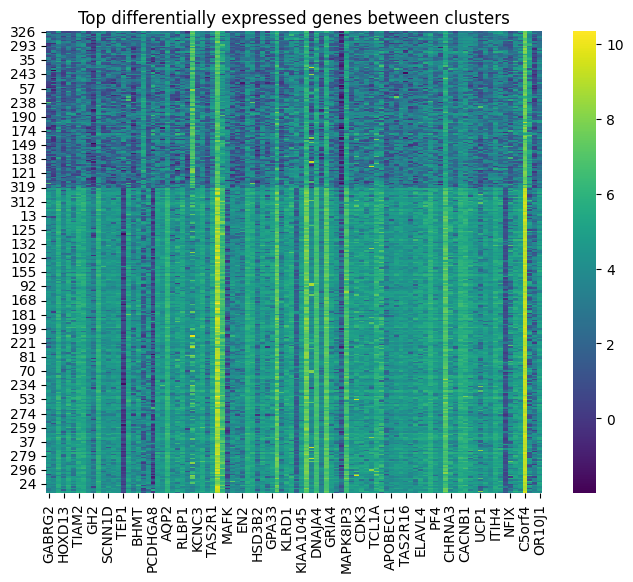

In [274]:
# Visualization using a heatmap

top_genes = diff_df["gene"].head(100)

plt.figure(figsize=(8,6))
sns.heatmap(
    df_gex_new[top_genes].assign(cluster=labels)
        .sort_values("cluster")
        .drop(columns="cluster"),
    cmap="viridis"
)

plt.title("Top differentially expressed genes between clusters")
plt.show()

In [275]:
# Analysis of differences in baseline characteristics between clusters

df_pat_clustered = df_pat.copy()
df_pat_clustered["cluster"] = labels

cluster_0_age = df_pat_clustered.loc[df_pat_clustered["cluster"] == 0, "age"]
cluster_1_age = df_pat_clustered.loc[df_pat_clustered["cluster"] == 1, "age"]

# Summary statistics
age_summary = df_pat_clustered.groupby("cluster")["age"].describe()
print("Age summary per cluster:")
print(age_summary)

# Statistical test
stat, pval = ttest_ind(cluster_0_age, cluster_1_age, nan_policy="omit")
print(f"\nT-test for age difference between clusters: stat={stat:.3f}, p-value={pval:.3e}")

Age summary per cluster:
         count       mean        std   min   25%   50%   75%   max
cluster                                                           
0         71.0  62.901408   9.202725  43.0  58.0  64.0  69.0  80.0
1        181.0  57.005525  12.434047  24.0  47.0  57.0  65.0  88.0

T-test for age difference between clusters: stat=3.623, p-value=3.523e-04


In [276]:

# Function to cleanly format continuous variables
def format_continuous(series):
    n_avail = series.notna().sum()
    mean = series.mean()
    std = series.std()
    median = series.median()
    min_val = series.min()
    max_val = series.max()
    return f"{mean:.1f} ± {std:.1f} (median {median}, range {min_val}–{max_val}, n={n_avail})"

# Function to cleanly format categorical variables
def format_categorical(series):
    counts = series.value_counts(dropna=False)
    total = len(series)
    lines = []
    for val, n in counts.items():
        if pd.isna(val):
            lines.append(f"Missing: {n} ({n/total*100:.1f}%)")
        else:
            lines.append(f"{int(val)}: {n} ({n/total*100:.1f}%)")
    return "\n".join(lines)

# Define columns and display names
continuous_cols = [("age", "Age (years)"), ("size", "Tumor size")]
categorical_cols = [("grade", "Histological grade"),
                    ("node", "Lymph node status"),
                    ("er", "ER status"),
                    ("relapse", "Relapse status")]

# Build the final table
rows = []
for cluster in sorted(df_pat_clustered["cluster"].unique()):
    cluster_df = df_pat_clustered[df_pat_clustered["cluster"] == cluster]
    row = {
        "Cluster": cluster,
        "Total (n)": len(cluster_df)
    }
    # Add continuous summaries
    for col, name in continuous_cols:
        row[name] = format_continuous(cluster_df[col])
    # Add categorical summaries
    for col, name in categorical_cols:
        row[name] = format_categorical(cluster_df[col])
    
    rows.append(row)

final_table = pd.DataFrame(rows)

# Display nicely
pd.set_option("display.max_colwidth", None)
print(final_table)


   Cluster  Total (n)                                        Age (years)  \
0        0        111    62.9 ± 9.2 (median 64.0, range 43.0–80.0, n=71)   
1        1        216  57.0 ± 12.4 (median 57.0, range 24.0–88.0, n=181)   

                                     Tumor size  \
0   2.6 ± 1.4 (median 2.3, range 0.0–7.0, n=72)   
1  2.1 ± 1.0 (median 2.0, range 0.0–6.0, n=179)   

                                                 Histological grade  \
0  2: 52 (46.8%)\n1: 22 (19.8%)\nMissing: 19 (17.1%)\n3: 18 (16.2%)   
1  2: 91 (42.1%)\n3: 46 (21.3%)\n1: 46 (21.3%)\nMissing: 33 (15.3%)   

                                    Lymph node status  \
0   0: 45 (40.5%)\nMissing: 44 (39.6%)\n1: 22 (19.8%)   
1  0: 147 (68.1%)\nMissing: 36 (16.7%)\n1: 33 (15.3%)   

                                           ER status  \
0                  1: 110 (99.1%)\nMissing: 1 (0.9%)   
1  1: 152 (70.4%)\n0: 46 (21.3%)\nMissing: 18 (8.3%)   

                                      Relapse status  
0  Miss

In [277]:
#PART III Prediction
# BUILD MODELS FOR different targets
# Handling of Class imbalance

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier as KNN
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from xgboost import XGBClassifier
from sklearn.utils import class_weight
import tensorflow as tf
from sklearn.metrics import (accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)


In [278]:
#df_gex contains gene expression
# df_pat contains patient data/ label/ meta and some NAs


# we will do the prediction for each target individually (individual dataset) as there are a varying number of missing labels in df_pat.
# Start with df_pat[ER] as target
mask = df_pat["er"].notna() # only include those with existing data-> no imputation of missing values
X = df_gex.loc[mask].values   
y = df_pat.loc[mask, "er"].values



X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.28, stratify=y, random_state=0)


# Fit scaler train only, then transform train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_original)   # fit on train
X_test_scaled  = scaler.transform(X_test_original) 


# Fit PCA on train only, then transform train and test
pca = PCA(n_components=5, random_state=42) 
X_train = pca.fit_transform(X_train_scaled)  
X_test  = pca.transform(X_test_scaled)

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
(mask==False).sum()
print(y)

{np.float64(0.0): np.int64(46), np.float64(1.0): np.int64(262)}
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.

In [ ]:
# PCA of ER data seti for orientation

plt.figure()
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    cmap=plt.cm.Set1,
    s=40,
)


In [280]:
# First ML model. Logistic regression.


model = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    class_weight="balanced",  # consider imbalance handling! "balanced" handles ER imbalance in log regression
    max_iter=1000,
    random_state=0
)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]   # ER+
y_pred = (y_prob >= 0.5).astype(int)


              precision    recall  f1-score   support

         0.0       0.55      0.92      0.69        13
         1.0       0.98      0.86      0.92        74

    accuracy                           0.87        87
   macro avg       0.77      0.89      0.80        87
weighted avg       0.92      0.87      0.89        87

ROC AUC: 0.9345114345114345
[[12  1]
 [10 64]]


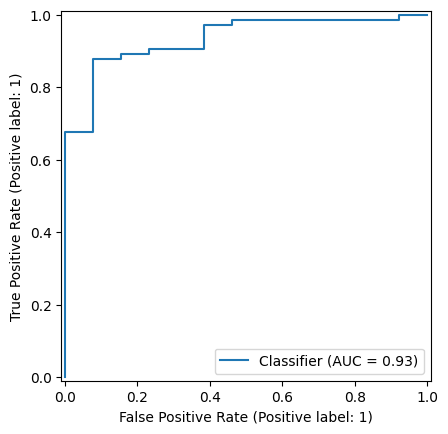

In [281]:
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)
print(confusion_matrix(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()


In [282]:
#Preparation for XGBoost. Calculate weights


n_pos = (y_train == 1).sum()  # ER+
n_neg = (y_train == 0).sum()  # ER-
scale_pos_weight = n_neg / n_pos  
print("Scale pos weight:", scale_pos_weight)

Scale pos weight: 0.17553191489361702


In [ ]:
# DECISION TREE
# Second model: XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=0.18,  # as computed
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)


# Train the model
model.fit(X_train, y_train)
# Predict the labels
y_pred_labels = model.predict(X_test)

print("Actual:", y_test)
print("Predicted:", y_pred_labels)
print("Difference:", y_test - y_pred_labels)
print("Accuracy:", accuracy_score(y_test, y_pred_labels))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        13
         1.0       0.96      0.96      0.96        74

    accuracy                           0.93        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.93      0.93      0.93        87

Confusion Matrix:

[[10  3]
 [ 3 71]]

ROC AUC: 0.9547817047817049


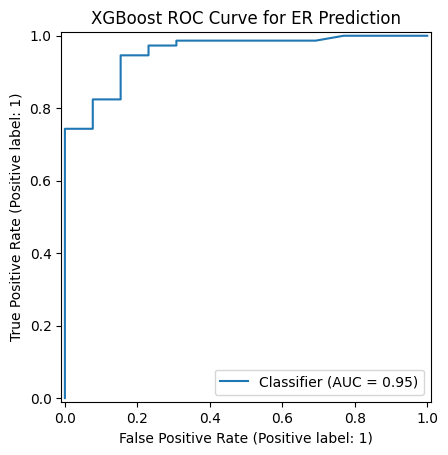

In [284]:
y_prob = model.predict_proba(X_test)[:, 1]  # probability of positive class (ER+)
y_pred = (y_prob >= 0.5).astype(int)        # threshold 0.5, can tune if needed

# --- Evaluate the model ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC:", auc)

# --- Plot ROC curve ---
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("XGBoost ROC Curve for ER Prediction")
plt.show()

In [285]:
# Preparation for deep learning. Calculate class weights. Then fit the model.
# Third model: deep learning


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary for Keras
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print(class_weights_dict)


#DeepLearning
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
  ])
model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train, Y_train,
    batch_size=10,
    epochs=500,
    verbose=False,
    class_weight=class_weights_dict  # 👈 important for imbalance
)

{0: np.float64(3.3484848484848486), 1: np.float64(0.5877659574468085)}


In [286]:
# Probabilities for positive class (ER+)
y_prob = model.predict(X_test)[:, 1]

# Predicted labels with default threshold 0.5
y_pred = (y_prob >= 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Classification Report:

              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64        13
         1.0       0.93      0.95      0.94        74

    accuracy                           0.90        87
   macro avg       0.80      0.78      0.79        87
weighted avg       0.89      0.90      0.89        87

Confusion Matrix:

[[ 8  5]
 [ 4 70]]

ROC AUC: 0.8711018711018711


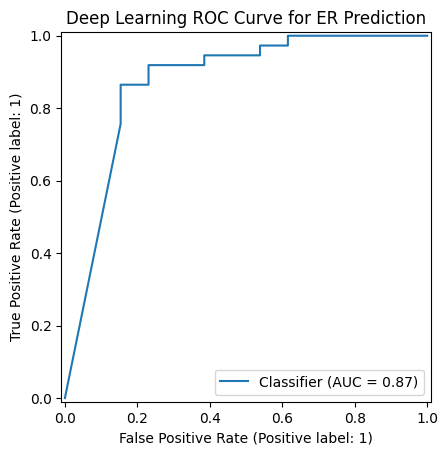

In [287]:
# Classification metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ROC AUC
auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC:", auc)

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("Deep Learning ROC Curve for ER Prediction")
plt.show()

In [ ]:
#### Change target to predict. Relapse is the most clinically relevant measure that can be predicted using the provided dataset.
## Same order of analyses (as with ER status prediction)
# predict relapse

mask = df_pat["relapse"].notna()
X = df_gex.loc[mask].values   # gene expression
y = df_pat.loc[mask, "relapse"].values



X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.28,stratify=y, random_state=0)


# Fit scaler train only, then transform train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_original)   # fit on train
X_test_scaled  = scaler.transform(X_test_original) 


# Fit PCA on train only, then transform train and test
pca = PCA(n_components=5, random_state=42) 
X_train = pca.fit_transform(X_train_scaled)  # fit on train
X_test  = pca.transform(X_test_scaled)

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
(mask==False).sum()
print(y)

plt.figure()
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    cmap=plt.cm.Set1,
    s=40,
)


              precision    recall  f1-score   support

         0.0       0.56      0.53      0.54        36
         1.0       0.39      0.42      0.41        26

    accuracy                           0.48        62
   macro avg       0.48      0.48      0.48        62
weighted avg       0.49      0.48      0.49        62

ROC AUC: 0.4722222222222222
[[19 17]
 [15 11]]


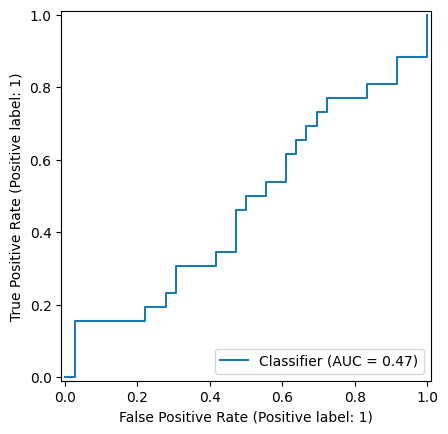

In [289]:
model = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    class_weight="balanced",  
    max_iter=1000,
    random_state=0
)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1] 
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)
print(confusion_matrix(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()

In [290]:
n_pos = (y_train == 1).sum()  # relapse+
n_neg = (y_train == 0).sum()  # relapse-
scale_pos_weight = n_neg / n_pos  # upweight minority
print("Scale pos weight:", scale_pos_weight)

Scale pos weight: 1.4375


In [ ]:
# DECISION TREE
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=1.48,  # as computed
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)


# Train the model
model.fit(X_train, y_train)
# Predict the labels
y_pred_labels = model.predict(X_test)

print("Actual:", y_test)
print("Predicted:", y_pred_labels)
print("Difference:", y_test - y_pred_labels)
print("Accuracy:", accuracy_score(y_test, y_pred_labels))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.62      0.50      0.55        36
         1.0       0.45      0.58      0.51        26

    accuracy                           0.53        62
   macro avg       0.54      0.54      0.53        62
weighted avg       0.55      0.53      0.53        62

Confusion Matrix:

[[18 18]
 [11 15]]

ROC AUC: 0.5438034188034189


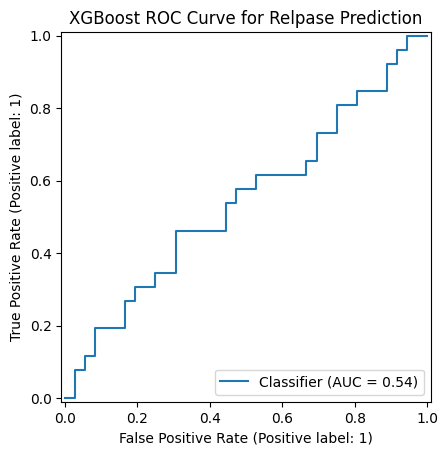

In [292]:
y_prob = model.predict_proba(X_test)[:, 1]  # probability of positive class (Relapse+)
y_pred = (y_prob >= 0.5).astype(int)        # threshold 0.5, can tune if needed

# --- Evaluate the model ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC:", auc)

# --- Plot ROC curve ---
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("XGBoost ROC Curve for Relpase Prediction")
plt.show()

In [293]:
#######PART IV EVALUATION, VALIDATION RIGOR
# ER Prediction needs more sophisticated evaluation. Relapse prediction performed bad and is not considered for further evaluation.

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

mask = df_pat["er"].notna() 
X = df_gex.loc[mask].values   
y = df_pat.loc[mask, "er"].values

# 1. Train / test split (hold-out test set)
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.28, stratify=y, random_state=0)



# 2. Internal train / validation split (for early stopping)
X_tr_original, X_val_original, y_tr, y_val = train_test_split(
    X_train_original, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

# 3. Scaling (fit ONLY on X_tr)
scaler = StandardScaler()
X_tr_scaled  = scaler.fit_transform(X_tr_original)
X_val_scaled = scaler.transform(X_val_original)
X_test_scaled = scaler.transform(X_test_original)

# 4. PCA (fit ONLY on X_tr)
pca = PCA(n_components=5, random_state=42)
X_tr = pca.fit_transform(X_tr_scaled)
X_val = pca.transform(X_val_scaled)
X_test = pca.transform(X_test_scaled)

In [294]:
# XGBoost with early stopping rounds
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    eval_metric='logloss',
    early_stopping_rounds=30,
    scale_pos_weight=0.18,
    random_state=42
)

model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

print("Best iteration:", model.best_iteration)
print("Best validation logloss:", model.best_score)

# Result: best iteration n=70

Best iteration: 70
Best validation logloss: 0.4112885913087262


In [295]:
# calculate scores on hold out set, apply adjusted model with 70 iterations on train set, then calculate performance on test set
scaler_final = StandardScaler()
X_train_s = scaler_final.fit_transform(X_train_original)
X_test_s  = scaler_final.transform(X_test_original)

pca_final = PCA(n_components=5, random_state=42)
X_train_p = pca_final.fit_transform(X_train_s)
X_test_p  = pca_final.transform(X_test_s)

##adjusted model
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=70,
    max_depth=4,
    learning_rate=0.05,
    eval_metric='logloss',
    scale_pos_weight=0.18,
    random_state=42
)


model.fit(X_train_p, y_train)


y_pred = model.predict(X_test_p)
y_proba = model.predict_proba(X_test_p)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

acc, auc, f1

(0.9425287356321839, 0.9604989604989606, 0.9659863945578231)

In [296]:
###Cross validation. The number of boosting iterations was fixed based on a prior internal validation and held constant during cross-validation.

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5, random_state=42)),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        n_estimators=70,
        max_depth=4,
        learning_rate=0.05,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=42
    ))
])

# Run 5-fold CV (accuracy, try out: other measures)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_acc = cross_val_score(
    pipeline,
    X_train_original,
    y_train,
    cv=cv,
    scoring='accuracy'
)

scores_auc = cross_val_score(
    pipeline,
    X_train_original,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

print("CV Accuracy: %.3f ± %.3f" % (scores_acc.mean(), scores_acc.std()))
print("CV AUC: %.3f ± %.3f" % (scores_auc.mean(), scores_auc.std()))
print("Accuracy per CV fold:", scores_acc)


CV Accuracy: 0.860 ± 0.025
CV AUC: 0.900 ± 0.059
Accuracy per CV fold: [0.82222222 0.84090909 0.88636364 0.88636364 0.86363636]


In [ ]:

# Majority-class baseline
majority_clf = DummyClassifier(strategy="most_frequent")

majority_clf.fit(X_train_p, y_train)

y_pred_majority = majority_clf.predict(X_test_p)

print(classification_report(y_test, y_pred_majority))
print("Accuracy:", accuracy_score(y_test, y_pred_majority))

In [ ]:
# Adjusted XGBoost model after analysis of early stopping rounds-> use best number of iterations here. Then optimize other hyperparameters using GridSearchCV
xgb = XGBClassifier(
    objective='binary:logistic',
    n_estimators=70,
    eval_metric='logloss',
    scale_pos_weight=0.18,
    random_state=42,
    use_label_encoder=False
)


# Hyperparameter grid (keep it small!)
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.5, 1.0]
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy', 
    n_jobs=-1,
    refit=True
)

# Fit on training data only
grid_search.fit(X_train_p, y_train)

# Results
print("Best accuracy:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)



In [299]:
#repeat evaluation with adapted hyperparameters

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5, random_state=42)),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=42
    ))
])


# Run 5-fold CV (accuracy, try out: other measures)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_acc = cross_val_score(
    pipeline,
    X_train_original,
    y_train,
    cv=cv,
    scoring='accuracy'
)

scores_auc = cross_val_score(
    pipeline,
    X_train_original,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

print("CV Accuracy: %.3f ± %.3f" % (scores_acc.mean(), scores_acc.std()))
print("CV AUC: %.3f ± %.3f" % (scores_auc.mean(), scores_auc.std()))


CV Accuracy: 0.869 ± 0.039
CV AUC: 0.893 ± 0.047


In [300]:
##final model on test data

model = XGBClassifier(
    objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=42
)


# Train the model 
model.fit(X_train_p, y_train)


y_pred_labels = model.predict(X_test_p)
y_proba = model.predict_proba(X_test_p)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred_labels)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("Actual labels:", y_test.values if hasattr(y_test, 'values') else y_test)
print("Predicted labels:", y_pred_labels)
print("Difference:", y_test.values - y_pred_labels if hasattr(y_test, 'values') else y_test - y_pred_labels)
print("Accuracy:", acc)
print("ROC-AUC:", auc)


Actual labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1]
Difference: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.]
Accuracy: 0.9540229885057471
ROC-AUC: 0.9480249480249481


In [301]:
######### Sensitivity Analysis (no PCA)
model = XGBClassifier(
    objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=42
)


# Train the model on the original (unscaled, no PCA)
model.fit(X_train_original, y_train)


y_pred_labels = model.predict(X_test_original)
y_proba = model.predict_proba(X_test_original)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred_labels)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("Actual labels:", y_test.values if hasattr(y_test, 'values') else y_test)
print("Predicted labels:", y_pred_labels)
print("Difference:", y_test.values - y_pred_labels if hasattr(y_test, 'values') else y_test - y_pred_labels)
print("Accuracy:", acc)
print("ROC-AUC:", auc)



Actual labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Predicted labels: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1]
Difference: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
Accuracy: 0.9310344827586207
ROC-AUC: 0.9594594594594595


In [302]:
#### Robustness over random seeds

seeds = range(10)

accs = []
f1s = []
aucs = []

for seed in seeds:
    model = XGBClassifier(
        objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=seed  # use different seed each iteration
    )

    model.fit(
        X_train_p, y_train
    )

    # Predict labels and probabilities on test set
    y_pred = model.predict(X_test_p)
    y_proba = model.predict_proba(X_test_p)[:, 1]

    # Compute metrics
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="macro"))
    aucs.append(roc_auc_score(y_test, y_proba))

# Print results
print("Accuracy: mean =", np.mean(accs), ", std =", np.std(accs))
print("Macro F1: mean =", np.mean(f1s), ", std =", np.std(f1s))
print("ROC-AUC: mean =", np.mean(aucs), ", std =", np.std(aucs))

Accuracy: mean = 0.9379310344827585 , std = 0.007624424805414702
Macro F1: mean = 0.876382964737697 , std = 0.013759717314276358
ROC-AUC: mean = 0.9561850311850313 , std = 0.0025361482117995456


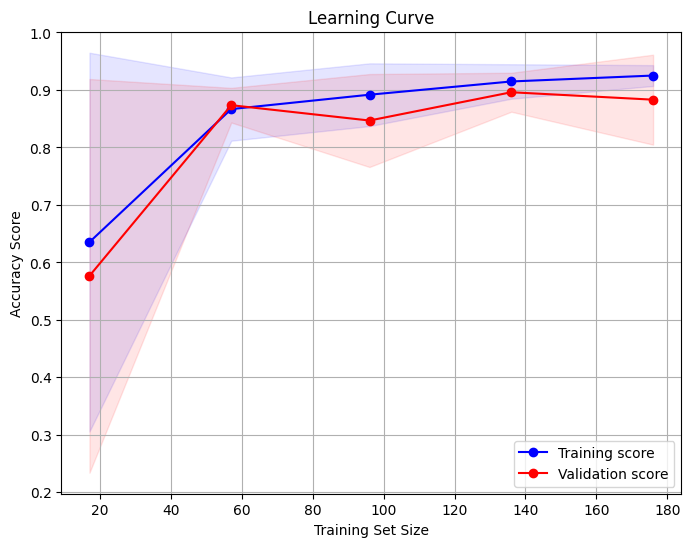

In [303]:
###high number of samples?- learning curves

# Define the model (no early stopping inside learning curve)
model = XGBClassifier(
        objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=seed
    )
# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train_p,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),  # 10%, 32%, 55%, 77%, 100%
    cv=5,                                   # 5-fold cross-validation
    scoring='accuracy',                     # use macro F1 for class imbalance
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [304]:
#TASK V LLM augmented analysis
# GPT recommended 15 genes panel. GPT recommends logistic regression with the following parameters.
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)


top15_genes = [
    "ESR1",    
    "PGR",      
    "GATA3",
    "TFF1",
    "TFF3",
    "XBP1",
    "CA12",
    "BCL2",
    "CCND1",
    "ERBB4",
    "MYB",
    "AGR2",
    "NAT1",
    "KRT18",
    "SPARCL1"
]

mask = df_pat["er"].notna()

y = df_pat.loc[mask, "er"].values
X = df_gex.loc[mask, top15_genes].values


X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.28, stratify=y, random_state=0)


# Fit scaler train only, then transform train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_original)   # fit on train
X_test_scaled  = scaler.transform(X_test_original) 


# Fit PCA on train only, then transform train and test
pca = PCA(n_components=5, random_state=42) 
X_train = pca.fit_transform(X_train_scaled)  # fit on train
X_test  = pca.transform(X_test_scaled)



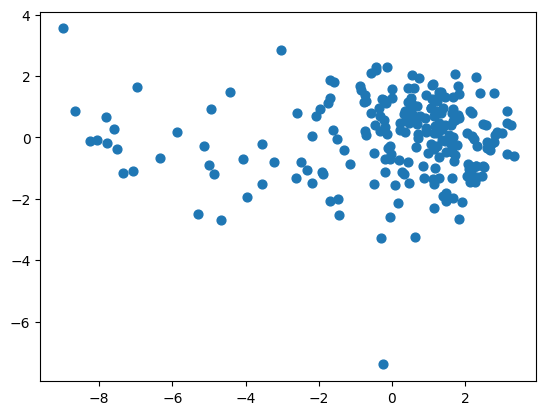

In [305]:
plt.figure()
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    s=40,
)


              precision    recall  f1-score   support

         0.0       0.40      0.77      0.53        13
         1.0       0.95      0.80      0.87        74

    accuracy                           0.79        87
   macro avg       0.68      0.78      0.70        87
weighted avg       0.87      0.79      0.82        87

ROC AUC: 0.8835758835758836
[[10  3]
 [15 59]]


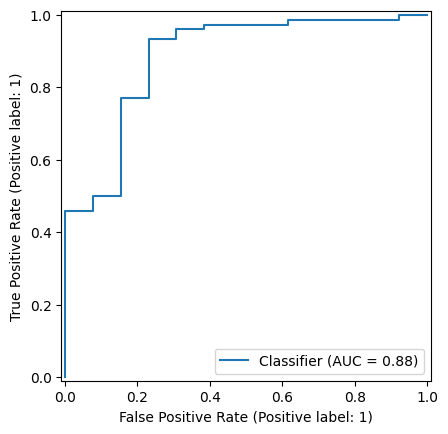

In [306]:
# model on PCA-transformed data of LLM-selected genes


model = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    class_weight="balanced", 
    max_iter=1000,
    random_state=0
)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]   # ER+
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)
print(confusion_matrix(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()

              precision    recall  f1-score   support

         0.0       0.40      0.77      0.53        13
         1.0       0.95      0.80      0.87        74

    accuracy                           0.79        87
   macro avg       0.68      0.78      0.70        87
weighted avg       0.87      0.79      0.82        87

ROC AUC: 0.867983367983368
[[10  3]
 [15 59]]


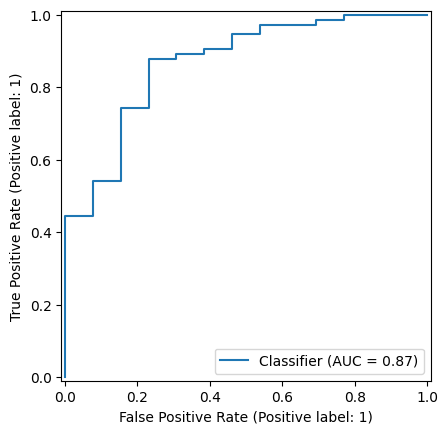

In [307]:
# model on original data

model = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    class_weight="balanced", 
    max_iter=1000,
    random_state=0
)
model.fit(X_train_original, y_train)
y_prob = model.predict_proba(X_test_original)[:, 1]   # ER+
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)
print(confusion_matrix(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()

In [308]:
# DECISION TREE on PCA-transformed data with hyperparameters from PARTIV final model

model = XGBClassifier(
    objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=seed
)

model.fit(X_train, y_train)


y_pred_labels = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred_labels)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("Actual labels:", y_test.values if hasattr(y_test, 'values') else y_test)
print("Predicted labels:", y_pred_labels)
print("Difference:", y_test.values - y_pred_labels if hasattr(y_test, 'values') else y_test - y_pred_labels)
print("Accuracy:", acc)
print("ROC-AUC:", auc)

Actual labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Predicted labels: [1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1]
Difference: [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.
  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
 -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Accuracy: 0.8850574712643678
ROC-AUC: 0.83991683991684


In [ ]:
## looking for new hyperparameters

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=0.18,
    random_state=42,
    use_label_encoder=False
)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",   
    cv=cv,
    n_jobs=-1,
    refit=True
)

grid.fit(X_train, y_train)


In [310]:
print("Best CV Macro acc:", grid.best_score_)
print("Best hyperparameters:")
for k, v in grid.best_params_.items():
    print(f"  {k}: {v}")


Best CV Macro acc: 0.8867676767676768
Best hyperparameters:
  colsample_bytree: 0.7
  learning_rate: 0.1
  max_depth: 4
  n_estimators: 100
  subsample: 1.0


In [311]:
# model on LLM seleceted, PCA transformed data with GRIDCV adjusted hyperparameters> no improvement

model = XGBClassifier(
    objective='binary:logistic',
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        subsample=1.0,
        colsample_bytree=0.7,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=seed
)

model.fit(X_train, y_train)


y_pred_labels = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred_labels)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("Actual labels:", y_test.values if hasattr(y_test, 'values') else y_test)
print("Predicted labels:", y_pred_labels)
print("Difference:", y_test.values - y_pred_labels if hasattr(y_test, 'values') else y_test - y_pred_labels)
print("Accuracy:", acc)
print("ROC-AUC:", auc)

Actual labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Predicted labels: [1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1]
Difference: [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  1.  0.  0.
  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
 -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Accuracy: 0.8390804597701149
ROC-AUC: 0.8056133056133057


In [312]:
# DECISION TREE on original, LLM selected data with hyperparameters from PARTIV final model (no improvement with GridCV)

model = XGBClassifier(
    objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=seed
)

model.fit(X_train_original, y_train)


y_pred_labels = model.predict(X_test_original)
y_proba = model.predict_proba(X_test_original)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred_labels)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("Actual labels:", y_test.values if hasattr(y_test, 'values') else y_test)
print("Predicted labels:", y_pred_labels)
print("Difference:", y_test.values - y_pred_labels if hasattr(y_test, 'values') else y_test - y_pred_labels)
print("Accuracy:", acc)
print("ROC-AUC:", auc)

Actual labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Predicted labels: [1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 1]
Difference: [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
 -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
Accuracy: 0.8735632183908046
ROC-AUC: 0.9272349272349273


In [313]:
#CV evaluation on LLM selected data // PCA-transformed data
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5, random_state=42)),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=42
    ))
])

# Run 5-fold CV (accuracy)
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

scores_auc = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print("Mean CV AUC:", scores_auc.mean())


CV scores: [0.84444444 0.75       0.93181818 0.84090909 0.81818182]
Mean CV accuracy: 0.837070707070707
Mean CV AUC: 0.8619183092867303


In [314]:
#CV evaluation on LLM selected data //no PCA


pipeline = Pipeline([
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        n_estimators=70,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=1,
        scale_pos_weight=0.18,
        eval_metric='logloss',
        random_state=42
    ))
])

# Run 5-fold CV (accuracy)
scores = cross_val_score(pipeline, X_train_original, y_train, cv=5)
print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

scores_auc = cross_val_score(pipeline, X_train_original, y_train, cv=5, scoring='roc_auc')
print("Mean CV AUC:", scores_auc.mean())

CV scores: [0.88888889 0.79545455 0.77272727 0.86363636 0.88636364]
Mean CV accuracy: 0.8414141414141414
Mean CV AUC: 0.9211406895617422
